Task 2:  Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

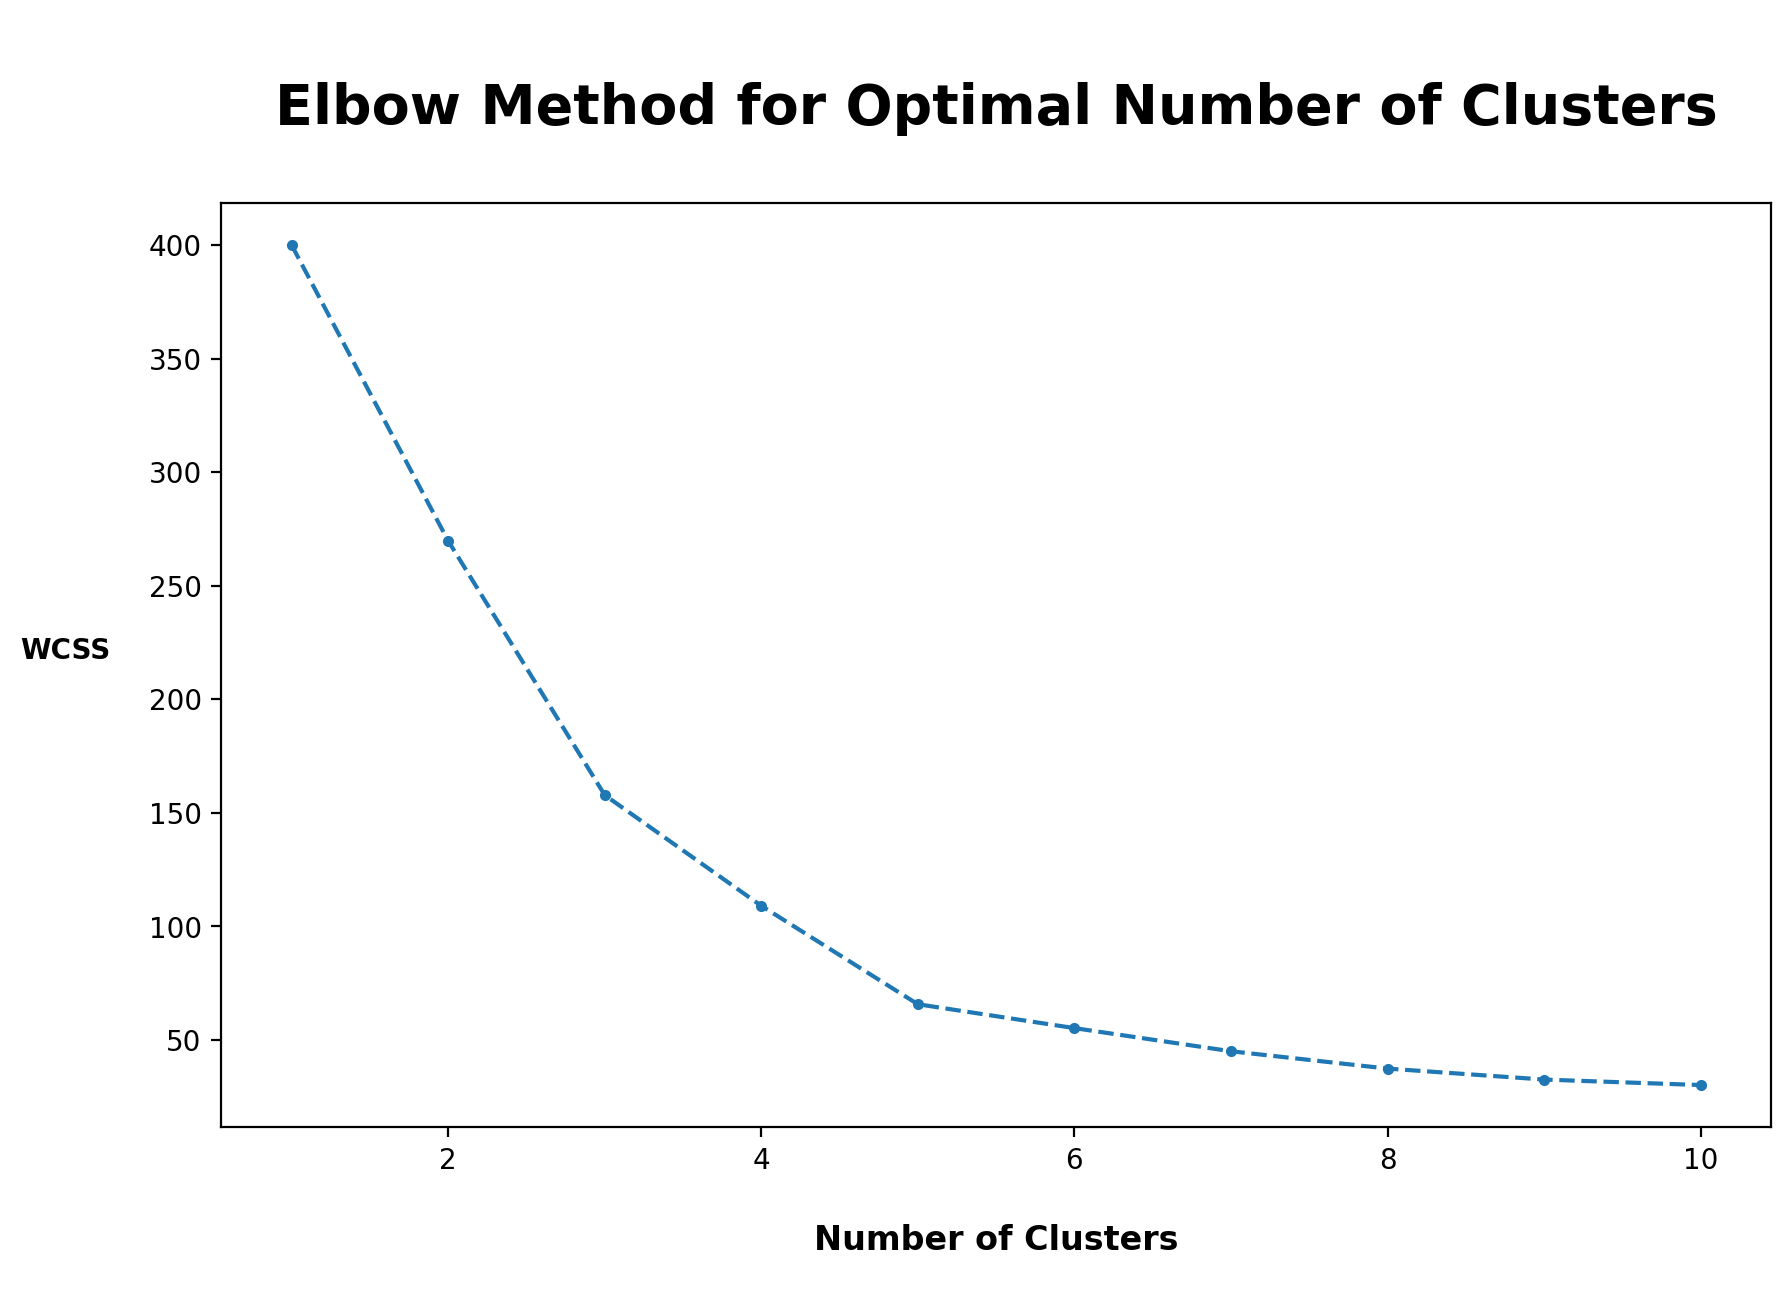

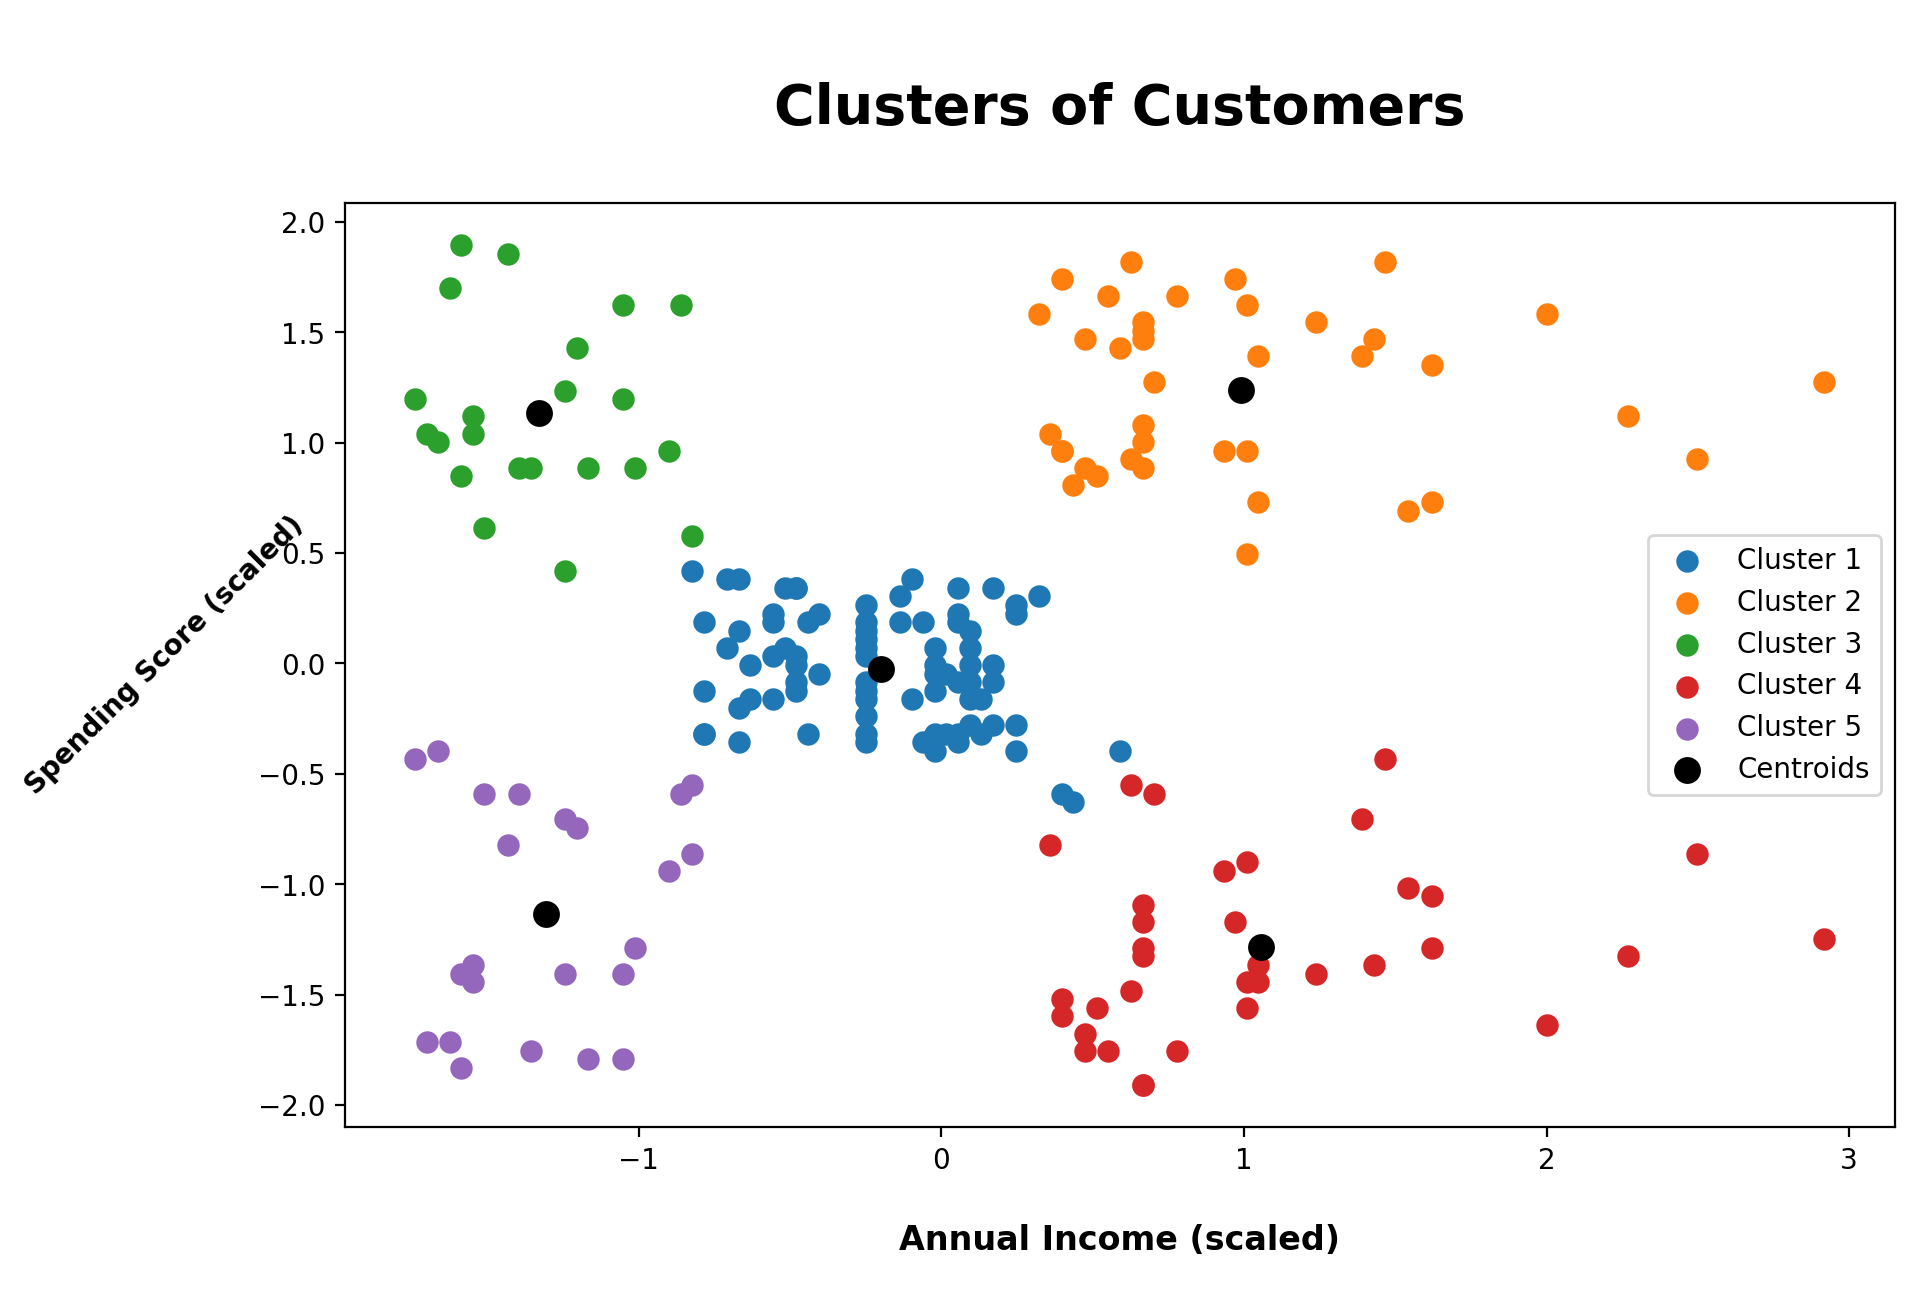

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6), dpi = 200)
plt.plot(range(1, 11), wcss, marker='.', linestyle='--')
plt.title('\nElbow Method for Optimal Number of Clusters\n', fontweight = 'bold', fontsize = 20)
plt.xlabel('\nNumber of Clusters\n', fontweight = 'bold', fontsize = 12)
plt.ylabel('WCSS', rotation = 0, labelpad = 30, fontweight = 'bold', fontsize = 10)
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6), dpi = 200)

for cluster_label in range(5):
    plt.scatter(X_scaled[y_kmeans == cluster_label, 0], X_scaled[y_kmeans == cluster_label, 1], label = f'Cluster {cluster_label+1}', s=50)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='black', label='Centroids', s=300, marker='.')

plt.title('\nClusters of Customers\n', fontweight = 'bold', fontsize = 20)
plt.xlabel('\nAnnual Income (scaled)\n', fontweight = 'bold', fontsize = 12)
plt.ylabel('Spending Score (scaled)', rotation = 45, labelpad = 30, fontweight = 'bold', fontsize = 10)
plt.legend()
plt.show()
